In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from io_images import get_images_infoframe
import paramiko
import os 
from process_ims import get_ims_pixel_size

Get chunk images .tiff

In [10]:
base_path = "/mnt/gdrive/ThNe/development_retina/"
input_folder = "microglia/P15/F/L/" 
output_folder = "traice/p15/F/L/"
filename = "microglia_Age_P15_Sex_F_Side_L_Animal_1.tif"



In [4]:
import tifffile
import numpy as np
import os

# Paths
base_path = "/mnt/gdrive/ThNe/development_retina/"
input_folder = "microglia/P15/F/L/"
filename = "microglia_Age_P15_Sex_F_Side_L_Animal_1.tif"
full_path = os.path.join(base_path, input_folder, filename)

# Load the TIFF file
with tifffile.TiffFile(full_path) as tif:
    data = tif.asarray()[:40]  # Take only the first 100 slices


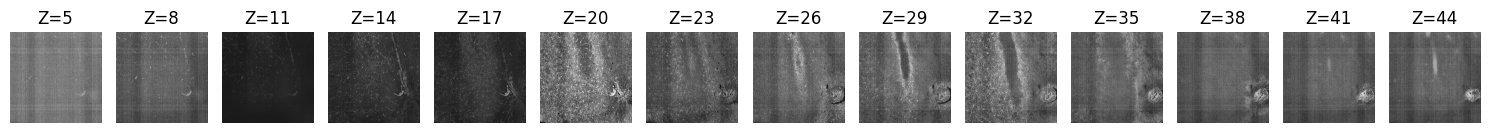

In [ ]:
# import matplotlib.pyplot as plt
# from skimage import exposure

# # Define Z slices and crop region
# z_slices = range(5, 45, 3)
# x_range = slice(2500, 4000)
# y_range = slice(2500, 4000)

# # Plot each selected slice
# fig, axes = plt.subplots(1, len(z_slices), figsize=(15, 5))
# for ax, z in zip(axes, z_slices):
#     img = data[z, x_range, y_range]
#     tile_clahe = exposure.equalize_adapthist(img, clip_limit=0.1)

#     ax.imshow(tile_clahe, cmap='gray')
#     ax.set_title(f"Z={z}")
#     ax.axis('off')

# plt.tight_layout()
# plt.show()


In [5]:
pix_size = {
    'x': 0.339024328759285,
    'y': 0.339024328759285,
    'z': 0.9
}

In [6]:
size = data.shape
# Create new metadata
metadata = {
    # Physical dimensions in microns
    "ExtendMinX": 0,
    "ExtendMaxX": size[2] * pix_size['x'],
    "ExtendMinY": 0,
    "ExtendMaxY": size[1] * pix_size['y'],
    "ExtendMinZ": 0,
    "ExtendMaxZ": size[0] * pix_size['z'],
    # Dimensions in pixels
    "SizeX": size[2],
    "SizeY": size[1],
    "SizeZ": size[0],
}


# Save to new file
output_filename = filename.replace(".tif", "_trick.tif")
output_path = os.path.join(base_path, input_folder, output_filename)

tifffile.imwrite(output_path, data, metadata=metadata)

print(f"Saved new file to: {output_path}")


Saved new file to: /run/user/1009/gvfs/smb-share:server=fs.ista.ac.at,share=drives/tnegrell/group/siegegrp/ThNe/development_retina/microglia/P15/F/L/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick.tif


In [ ]:
# # project_path = "results/retina_example"
# infoframe = get_images_infoframe(win_path, 
#                                  extension='.tif',
#                                  conditions = [],
# )

In [13]:
output_filename

'microglia_Age_P15_Sex_F_Side_L_Animal_1_trick.tif'

In [11]:
save_path = os.path.join(base_path, "traice/")


In [12]:
save_path

'/mnt/gdrive/ThNe/development_retina/traice/'

In [14]:
function = f'CUDA_VISIBLE_DEVICES=0 trAIce img2swc'

file_path_args = f'-ip "{os.path.join(base_path, input_folder, output_filename)}"'

cube_args = f'-wss "(128, 128, 16)" -wsb "(128, 128, 16)" -tp "(2.5, 2.5, 1.1)"'

save_args = f'-spd "{save_path}" -mp "{save_path}" -spsl "{save_path}" -bsp "{save_path}" -nw 1'

command = f'{function} {file_path_args} {cube_args} {save_args}'

In [28]:
print(command)

CUDA_VISIBLE_DEVICES=0 trAIce img2swc -ip "/run/user/1009/gvfs/smb-share:server=fs.ista.ac.at,share=drives/tnegrell/group/siegegrp/ThNe/development_retina/microglia/P15/F/L/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick.tif" -wss "(128, 128, 16)" -wsb "(128, 128, 16)" -tp "(2.5, 2.5, 1.1)" -spd "/run/user/1009/gvfs/smb-share:server=fs.ista.ac.at,share=drives/tnegrell/group/siegegrp/ThNe/development_retina/traice/" -mp "/run/user/1009/gvfs/smb-share:server=fs.ista.ac.at,share=drives/tnegrell/group/siegegrp/ThNe/development_retina/traice/" -spsl "/run/user/1009/gvfs/smb-share:server=fs.ista.ac.at,share=drives/tnegrell/group/siegegrp/ThNe/development_retina/traice/" -bsp "/run/user/1009/gvfs/smb-share:server=fs.ista.ac.at,share=drives/tnegrell/group/siegegrp/ThNe/development_retina/traice/" -nw 1


In [ ]:
import subprocess
subprocess.run(command, shell=True, check=True)


=======Make mat files out of img/nd2 file=======
img_path: /mnt/gdrive/ThNe/development_retina/microglia/P15/F/L/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick.tif
/mnt/gdrive/ThNe/development_retina/microglia/P15/F/L/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick.tif
(7480, 7486, 40)
{'ExtendMinX': 0, 'ExtendMinY': 0, 'ExtendMinZ': 0, 'ExtendMaxX': 2535.901979119452, 'ExtendMaxY': 2537.9361250920074, 'ExtendMaxZ': 36.0, 'SizeX': 7480, 'SizeY': 7486, 'SizeZ': 40}
=======Make Masks Soma=======
Target pixel/micrometer: x=2.5, y=2.5, z=1.1
metadata: 0 - 0 - 0 - 2535.901979119452 - 2537.9361250920074 - 36.0 - 7480 - 7486 - 40
px2mu origin: 2.9496408227092834 - 2.9496408227092834 - 1.1111111111111112
2.9496408227092834
False
new size: 6339 - 6344 - 39
- Scaling the image to target ...
- Making 3d images from somas and traces of the cells ...
 Image size: (6339, 6344, 39) - SizeX: 6339 - SizeY: 6344 - SizeZ: 39
- Slicing the image and masks into windows ...


100%|██████████| 50/50 [00:00<00:00, 7381.48it/s]


=======Soma Detection Stage=======
Soma location: /mnt/gdrive/ThNe/development_retina/traice/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick/soma/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick
Loading dataset: /mnt/gdrive/ThNe/development_retina/traice/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick/img ==> Loading
Dataset: /mnt/gdrive/ThNe/development_retina/traice/microglia_Age_P15_Sex_F_Side_L_Animal_1_trick ==> Loaded
Device: cuda
num_patches: 512
patch size: (16, 16, 2)


  0%|          | 0/7500 [00:00<?, ?it/s]

Loaded model from checkpoint. Ignored keys: []
Loaded model from checkpoint. Ignored keys: []
Loaded model from checkpoint. Ignored keys: []


/opt/trAIce/trAIce/model_io.py:110: RuntimeWarning: invalid value encountered in cast
  segmented = np.uint8(segmented * 255)
 84%|████████▍ | 6328/7500 [05:35<01:23, 14.09it/s]